<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/speech-recognition/Lab-Work/20221016-Lab-10-MTech-AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d kongaevans/speaker-recognition-dataset
!unzip *.zip

In [8]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
import IPython.display as ipd

In [3]:
ipd.Audio('/content/16000_pcm_speeches/Nelson_Mandela/101.wav')

In [4]:
ipd.Audio('/content/16000_pcm_speeches/Magaret_Tarcher/101.wav')

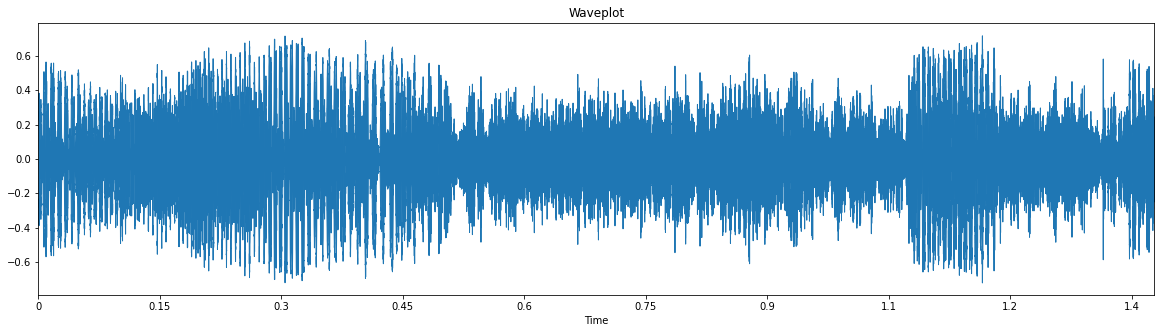

In [5]:
path = '/content/16000_pcm_speeches/Nelson_Mandela/101.wav'
x , sr = librosa.load(path)
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveplot(x, sr=16000)
plt.show()

In [5]:
!pip install praat-parselmouth

y
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.7 MB 29.1 MB/s 


In [6]:
import parselmouth

In [13]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 94% 401M/428M [00:02<00:00, 200MB/s]
100% 428M/428M [00:02<00:00, 152MB/s]


In [ ]:
!unzip toronto-emotional-speech-set-tess.zip

In [22]:
ipd.Audio('/content/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav')

In [23]:
ipd.Audio('/content/TESS Toronto emotional speech set data/YAF_happy/YAF_back_happy.wav')

# Pitch Frequency

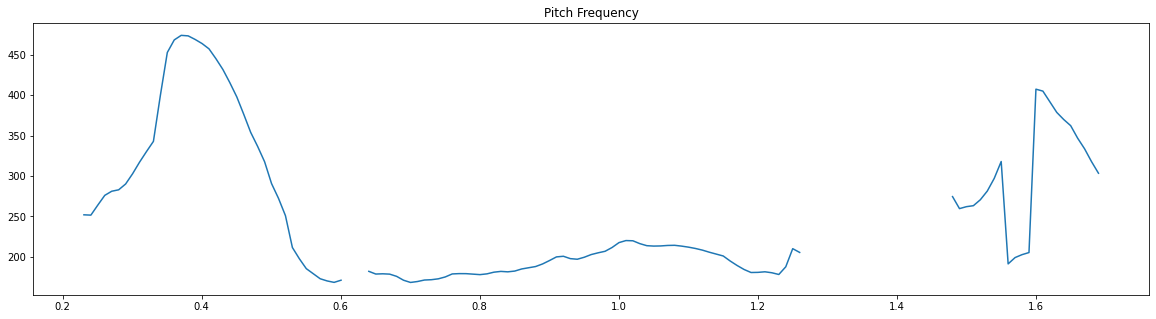

In [15]:
path = '/content/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav'
sound = parselmouth.Sound(path)
pitch = sound.to_pitch(time_step=0.01)
times = pitch.ts()

pitch_data = []
for dt in times:
    pitch_data.append(pitch.get_value_at_time(dt))

plt.figure(figsize=(20, 5))
plt.title('Pitch Frequency')
plt.plot(times, pitch_data)
plt.show()

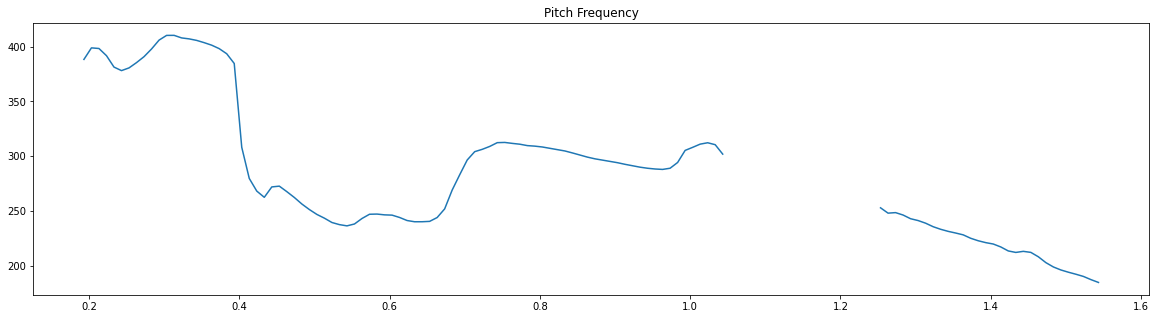

In [16]:
path = '/content/TESS Toronto emotional speech set data/YAF_happy/YAF_back_happy.wav'
sound = parselmouth.Sound(path)
pitch = sound.to_pitch(time_step=0.01)
times = pitch.ts()

pitch_data = []
for dt in times:
    pitch_data.append(pitch.get_value_at_time(dt))

plt.figure(figsize=(20, 5))
plt.title('Pitch Frequency')
plt.plot(times, pitch_data)
plt.show()

# Intensity

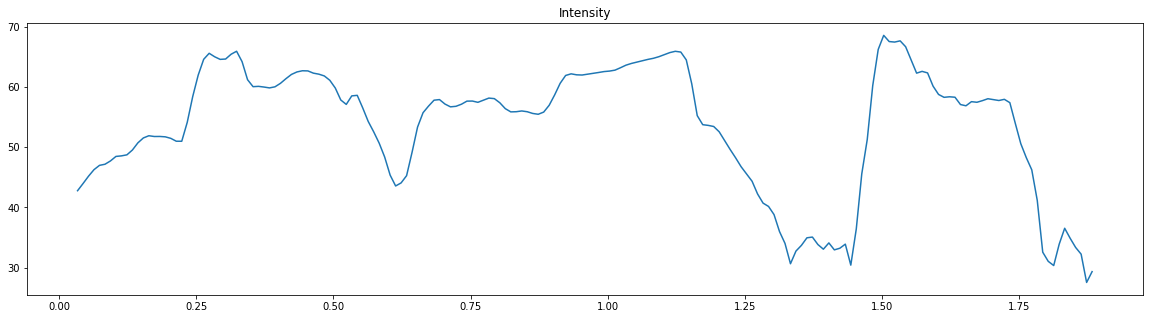

In [18]:
path = '/content/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav'
sound = parselmouth.Sound(path)
intensity = sound.to_intensity(time_step=0.01)

intensity_data = []
for dt in times:
    intensity_data.append(intensity.get_value(dt))

plt.figure(figsize=(20, 5))
plt.title('Intensity')
plt.plot(times, intensity_data)
plt.show()

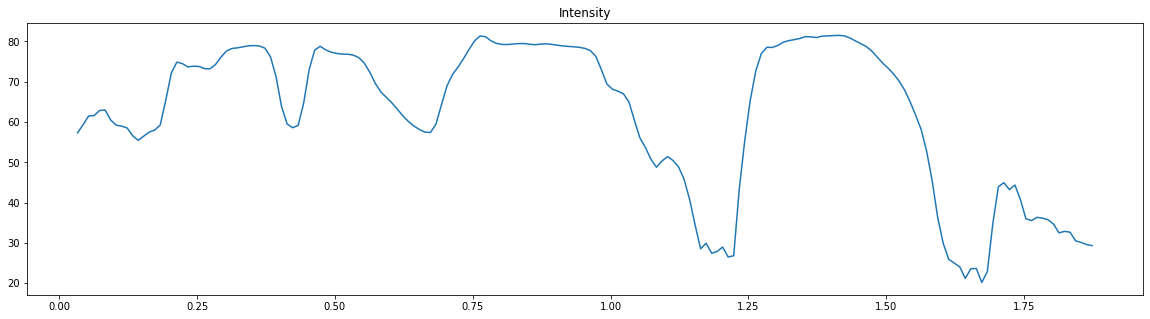

In [19]:
path = '/content/TESS Toronto emotional speech set data/YAF_happy/YAF_back_happy.wav'
sound = parselmouth.Sound(path)
intensity = sound.to_intensity(time_step=0.01)

intensity_data = []
for dt in times:
    intensity_data.append(intensity.get_value(dt))

plt.figure(figsize=(20, 5))
plt.title('Intensity')
plt.plot(times, intensity_data)
plt.show()

# Formants - Resonance

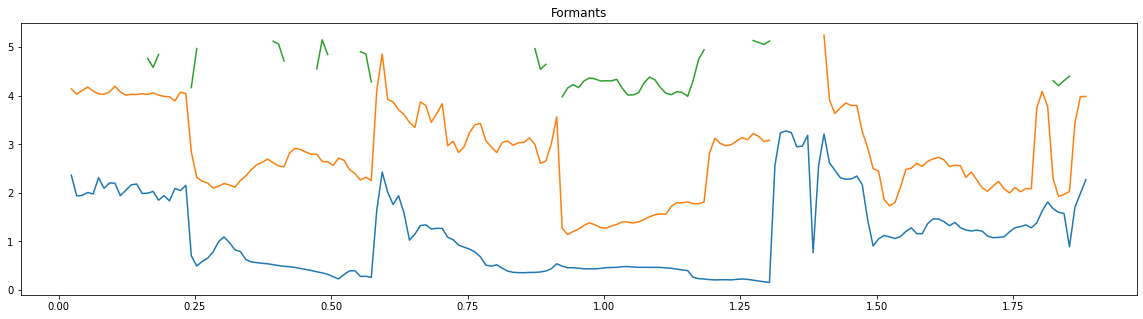

In [20]:
path = '/content/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav'
sound = parselmouth.Sound(path)
formants = sound.to_formant_burg(time_step=0.01, max_number_of_formants=3)

formant_1 = []
formant_2 = []
formant_3 = []

for dt in times:
    formant_1.append(formants.get_value_at_time(1, dt))
    formant_2.append(formants.get_value_at_time(2, dt))
    formant_3.append(formants.get_value_at_time(3, dt))


plt.figure(figsize=(20, 5))
plt.title('Formants')
plt.plot(times, np.array(formant_1)/1e3)
plt.plot(times, np.array(formant_2)/1e3)
plt.plot(times, np.array(formant_3)/1e3)
plt.show()

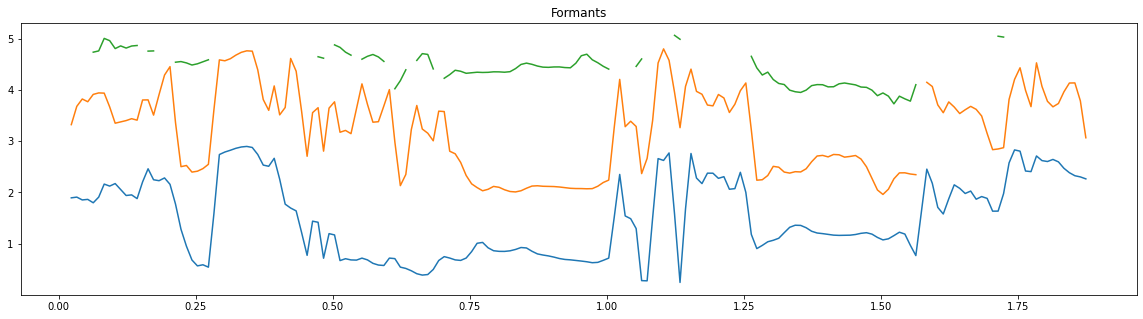

In [21]:
path = '/content/TESS Toronto emotional speech set data/YAF_happy/YAF_back_happy.wav'

sound = parselmouth.Sound(path)
formants = sound.to_formant_burg(time_step=0.01, max_number_of_formants=3)

formant_1 = []
formant_2 = []
formant_3 = []

for dt in times:
    formant_1.append(formants.get_value_at_time(1, dt))
    formant_2.append(formants.get_value_at_time(2, dt))
    formant_3.append(formants.get_value_at_time(3, dt))


plt.figure(figsize=(20, 5))
plt.title('Formants')
plt.plot(times, np.array(formant_1)/1e3)
plt.plot(times, np.array(formant_2)/1e3)
plt.plot(times, np.array(formant_3)/1e3)
plt.show()